<a href="https://colab.research.google.com/github/Fidem/PortfolioProjects/blob/main/FromScratchMNISTclassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is my attempt at implementing a Neural network from scratch.  I just want to implement a mirror of my tensorflow dense neural network solution.

In [1]:
import numpy as np
import tensorflow as tf

Okay I do want to cheat a bit and get the mnist dataset from the tensorflow keras api, its a lot easier.

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

Okay so we have our data.  Next is just creating a function for the log softmax activation function:

In [4]:


def logsumexp(x):
  a = x.max(axis=1)
  return a + np.log(np.exp(x-a.reshape((-1,1))).sum(axis=1))
  #return np.log(np.exp(x).sum(axis=1))




First we should initialise the network with random weights:

So we want to be able to initialise each layer of weights independently, and the weights are randomly sampled from a uniform distribtion between -1 and 1.  

In [13]:

def init_lay(inp, out):
  
  w = np.random.uniform(-1.,1.,size=(inp,out))/np.sqrt(inp*out)
  return w.astype(np.float32)

NOTE: OLI THE MATHS FOR THIS IS IN YOUR NOTEBOOK, CANT BE BOTHERED WRITING IT ALL IN MARKDOWN/LATEX...

Next is the forward propogation step.  For this, we need to activate the neurons (using weighted sum of inputs like linear regression), then run this through a non-linear activation function, then we just forward propogate to the output layer

So first we calc the dot product between our x input and the weights in layer 1.

Then we use the relu activation function.  Aka - if value is less than 0, =0, otherwise value = value.  This can be done easily using np.maximum, comparing x_l1, and an array of 0s.


NOTE: This is the holy grail code chunk, that has both the forward propogation (Passing input through to the output layer), and the backward propogation (Calculating derivatives of activation functions and layers to get the errors for gradient descent step)



In [6]:
def forward_pass(x, y):
  out = np.zeros((len(y),10),np.float32)
  out[range(out.shape[0]),y] = 1

  x_l1 = x.dot(layer1)
  x_relu = np.maximum(x_l1,0) 
  x_l2 = x_relu.dot(layer2)
  x_logsum = x_l2 - logsumexp(x_l2).reshape((-1,1))
  loss = (-out * x_logsum).mean(axis=1)
  d_out = -out / len(y)

  return d_out, x_logsum, x_relu, loss, x_l2

def backprop(x,y,dout,xlsm,xrelu):
  dx_lsm = dout - np.exp(xlsm) * dout.sum(axis=1).reshape((-1,1))
  d_l2 = xrelu.T.dot(dx_lsm)
  dx_relu = dx_lsm.dot(layer2.T)
  dx_l1 = (xrelu > 0).astype(np.float32) * dx_relu
  d_l1 = x.T.dot(dx_l1)
  return d_l1, d_l2


Okay that was awful and tragic and weird, but hopefully it will work?  Just need to actually write the loops and include gradient descent on the weights using the d_l1 and d_l2.

Need to set the global learning rate variable and initialise the layers.

Also idk, with each epoch i dont really really want to train with all 60,000 images.  thats kinda stoopid.  Why not just get a sample of lets say 100 images to train with each epoch??

In [16]:

learnrate = 0.001
np.random.seed(1)
layer1 = init_lay(784,128)
layer2 = init_lay(128,10)
losses = []
accuracy = []

for i in range(1000):
  rand = np.random.randint(0,x_train.shape[0],size=100)
  X = x_train[rand].reshape(-1,28*28)
  Y = y_train[rand]
  
  dout, xlsm, xrelu, loss, x_l2 = forward_pass(X,Y)
  losses.append(loss.mean())
  dl1, dl2 = backprop(X,Y,dout,xlsm,xrelu)

  res = np.argmax(x_l2,axis=1)
  acc = (res==Y).mean()
  accuracy.append(acc)

  layer1 -= learnrate*dl1
  layer2 -= learnrate*dl2
  print("Loss: {}, Accuracy: {} ".format(loss.mean(),acc))
  



Loss: 0.2800248861312866, Accuracy: 0.09 
Loss: 0.337372362613678, Accuracy: 0.29 
Loss: 0.30860435962677, Accuracy: 0.48 
Loss: 0.44710803031921387, Accuracy: 0.37 
Loss: 0.5943931341171265, Accuracy: 0.17 
Loss: 0.5106592178344727, Accuracy: 0.23 
Loss: 0.2623315155506134, Accuracy: 0.33 
Loss: 0.18669414520263672, Accuracy: 0.42 
Loss: 0.13514383137226105, Accuracy: 0.57 
Loss: 0.11385540664196014, Accuracy: 0.68 
Loss: 0.09561576694250107, Accuracy: 0.73 
Loss: 0.12429667264223099, Accuracy: 0.59 
Loss: 0.10766105353832245, Accuracy: 0.64 
Loss: 0.08670919388532639, Accuracy: 0.75 
Loss: 0.08082784712314606, Accuracy: 0.74 
Loss: 0.06835439056158066, Accuracy: 0.8 
Loss: 0.08355072885751724, Accuracy: 0.75 
Loss: 0.09786860644817352, Accuracy: 0.7 
Loss: 0.07872297614812851, Accuracy: 0.73 
Loss: 0.07420124858617783, Accuracy: 0.8 
Loss: 0.08655912429094315, Accuracy: 0.71 
Loss: 0.061961688101291656, Accuracy: 0.82 
Loss: 0.05408738926053047, Accuracy: 0.82 
Loss: 0.06899938732385

Wow so this all actually worked.  This is implementing a neural network FROM SCRATCH.  Pretty cool!!  I still have a LONG way to go though, something as "simple" as this had me absolutely stumped for so long....

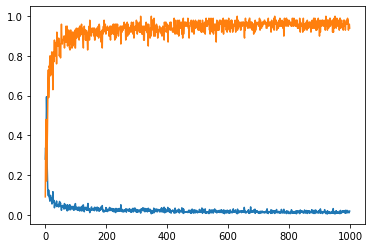

In [17]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.plot(accuracy)